# Executive Summary
We will build a **Linear Regression with Ridge Regularisation** model for `Ames Housing Data` dataset in order to as accurately predict the sales price of any house in the town of Ames. The dataset consists of robust dataset with over **70** columns of different features relating to houses sold from 2006-2010, relationship of some features will be attempted to be understood. We will predict that not all the factors will can be used to estimate the actual price of an Ames House.
# 1. Introduction
### 1.1 Background
There can be no question that access to housing remains unequal. Despite long-standing laws guarding against discrimination, members of disadvantaged groups have a harder time finding a high-quality place to live in a high-opportunity neighborhood. It’s far less obvious, however, whether—or how much—these disparities result from discrimination, because disadvantaged groups often differ systematically in employment, income, assets, and debts. That’s where the Urban Institute’s paired-testing research comes in.  
  
Paired testing, also known as auditing, is an effective and intuitive way to test whether and in what form discrimination exists. In a paired test, two people are assigned fictitious identities and qualifications that are comparable in all key respects. The identities differ only on the characteristic (for example, race or presence of a disability) being tested. Each tester of a pair then makes a similar request (information on available apartments, for example) and documents the interaction. With an appropriate sample of tests and statistical techniques, paired testing can single out discrimination. 

Ames is a town in the 23rd District of the state of Iowa. The 5 largest ethnic groups in Ames, IA are White (Non-Hispanic) (78.7%), Asian (Non-Hispanic) (11.4%), Black or African American (Non-Hispanic) (3.09%), Two+ (Non-Hispanic) (2.64%), and White (Hispanic) (2.6%). 0% of the households in Ames,
([*source*](https://datausa.io/profile/geo/ames-ia/))

To further objectivity is called besides the above pair testing and it is important to value the true price of a house. Therefore to supplement this it is seen that data science is necessary to estimate the true value of a property based on historical records.([*source*](https://www.urban.org/features/exposing-housing-discrimination))

([*further coverage*](https://www.washingtonpost.com/business/2021/03/18/report-housing-discrimination-renter-buyer/))

### 1.2 Problem Statement: 
The objective of the project is to use Ames Housing data to make a linear regression and regularisation model then use predictors to predict any Ames house sale price. This would most likely be to the benefit of all stakeholders within a house transaction (e.g. buyers, sellers, realtors, appraisers, real estate companies, mortgage lenders, credit evaluators, government housing boards). So this form of evaluation aims to be objective and use mathematical inference of objectively estimate a value of a house based on historical transactions.

The effectiveness will be determined in the training set based on the difference between predicted house sale price and the actual sales price provided in the training data. Then evaluated from the test set by the same method. Root-Mean-Squared Error is used to determine the best training model.

#### 1.2.1 Assumptions:
- Historical records are still relevant in the future. Although the year sold is also taken into account
- All variables provided include all the relevant factors in determining the price of a house sold
- Ridge and Lasso regularisation is sufficient to reduce significant multicollinearity if present

### 1.3 Data Description:
- train.csv - the training set
- test.csv - the test set
- data_description.txt - full description of each column prepared by *Sidharth Kumar Mohanty* ([*source*](https://www.kaggle.com/sidharth178/top-10-house-price-prediction/data))
- sample_sub_reg.csv - a benchmark submission from a linear regression on `Gr Liv Area`, `Yr Built`

### 1.4 Table of Content:
1. Introduction
2. Imports
3. Load Data
4. Exploratory Data Analysis  
    [4.1. Train Data Exploration](#4.1.-Train-Data-Exploration) 
        4.1.1. First 5 records - Train
        4.1.2. Data Shape - Train Data
        4.1.3. Data Information - Train Data
        4.1.4. Data Types - Train Data
        4.1.5. Null Values - Train Data
        4.1.6. Visualize missing value using Misingno - Train Data
    [4.2. Test Data Exploration](#4.2.-Test-Data-Exploration)  
        4.2.1. First 5 records - Test
        4.2.2. Data Shape - Test Data
        4.2.3. Data Information - Test Data
        4.2.4. Data Types - Test Data
        4.2.5. Null Values - Test Data
        4.2.6. Null Values - Test Data
    [4.3. Train & Test Data Comparison](#4.3.-Train-&-Test-Data-Comparison)  
        4.3.1. Data Type Comparison
        4.3.2. Null Value Comparison
        4.3.3. Distribution Comparison
        4.3.3.1. Distribution Comparison - Discrete
        4.3.3.2. Distribution Comparison - Continuous
        4.3.3.3. Linearity Check
        4.3.3.4. Distribution Comparison - Categorical
        4.3.2. Null Value Comparison
        4.3.3. Distribution Comparison
        4.3.3. Distribution Comparison
        4.3.3. Distribution Comparison
    [4.4. Find Suitable value for Numerical missing values](#4.4.-Find-Suitable-value-for-Numerical-missing-values)  
    [4.5. Temporal Variable Analysis](#4.5.-Temporal-Variable-Analysis)  
    [4.6. Data Correlation](#4.6.-Data-Correlation)  
    
[5. Feature Engineering](#5.-Feature-Engineering)  
    5.1. Drop Columns  
    5.2. Temporal Variable Change  
    5.3. Fill Missing Values   
    5.4. Convert Numerical fearure to Categorical    
[6. Model Development](#6.-Model-Development)  
    [6.0. OLS Baseline](#6.0-OLS-Baseline)  
        6.0.1. OLS Baseline fit  
        6.0.2. OLS Baseline Evaluating Model  
        6.0.3. Benchmark Submission  
    [6.1. OLS](#6.1-OLS)  
        6.1.1. OLS fit  
        6.1.2. OLS Evaluating Model  
    [6.2. Ridge](#6.2-Ridge)  
        6.2.1. Ridge fit  
        6.2.2. Ridge Evaluating Model  
    [6.3. Lasso](#6.3-Lasso)  
        6.3.1. Lasso fit  
        6.3.2. Lasso Evaluating Model  
    [6.4. Model Evaluation](#6.4-Model-Evaluation)  
[7. test submission](#7.-test-submission)  
[8. conclusions](#8.-conclusions)   
    [8.1.1. Recommendations](#8.1.1-Recommendations)  
    [8.1.2. Coefficients](#8.1.2-Coefficients)   
    [8.2. Final Considerations](#8.2-Final-Considerations)    

# 2. Imports

In [1]:
!pip install missingno

In [2]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

# 3. Load Data

In [3]:
train_df = pd.read_csv('./datasets/train.csv')
test_df = pd.read_csv('./datasets/test.csv')

# 4. Exploratory Data Analysis
### 4.1. Train Data Exploration

For both train and test dataset, We'mll explore following things

- First 5 rows
- Data shape
- Data information
- Data types
- Null value

### 4.1.1. First 5 records - Train

In [4]:
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### 4.1.2. Data Shape - Train Data

In [5]:
train_df.shape

(2051, 81)

### 4.1.3. Data Information - Train Data

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

### 4.1.4. Data Types - Train Data
there is classifiers, dicontinuous and continuous variables

In [7]:
train_dtype = train_df.dtypes
train_dtype.value_counts()

object     42
int64      28
float64    11
dtype: int64

### 4.1.5. Null Values - Train Data
There is missing data but model may not use columns with these missing data

In [8]:
train_df.isnull().sum().sort_values(ascending=False)[:27]

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Qual        114
Garage Yr Blt      114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Garage Cars          1
Mo Sold              0
dtype: int64

### 4.1.6. Visualize missing value using Misingno - Train Data

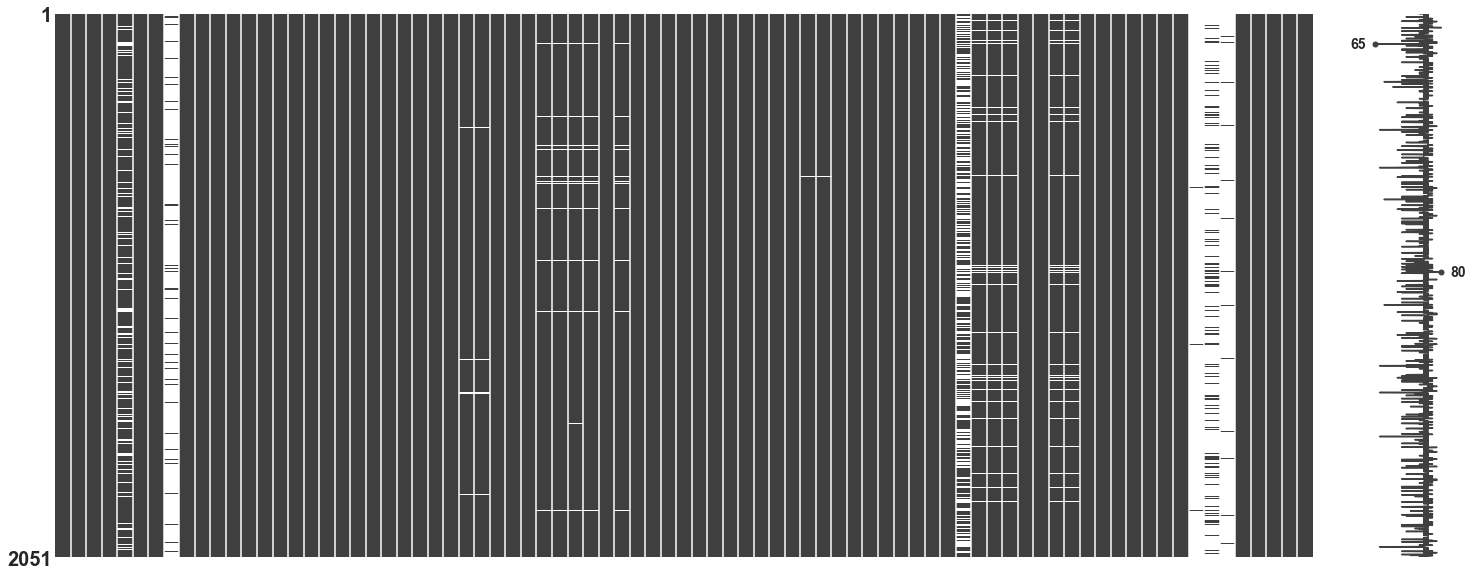

In [9]:
msno.matrix(train_df);

### 4.2. Test Data Exploration
### 4.2.1. First 5 records - Test

In [10]:
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


### 4.2.2. Data Shape - Test Data

In [11]:
test_df.shape

(878, 80)

### 4.2.3. Data Information - Test Data

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

### 4.2.4. Data Types - Test Data

In [13]:
test_dtype = test_df.dtypes
test_dtype.value_counts()

object     42
int64      35
float64     3
dtype: int64

### 4.2.5. Null Values - Test Data
Missing values is similar to Train so if variables are ignored in train set this can still apply for test without further manipulation of df.

In [14]:
test_df.isnull().sum().sort_values(ascending=False)[:20]

Pool QC           874
Misc Feature      837
Alley             820
Fence             706
Fireplace Qu      422
Lot Frontage      160
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Garage Type        44
BsmtFin Type 1     25
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 2     25
Electrical          1
Mas Vnr Type        1
Mas Vnr Area        1
Kitchen AbvGr       0
dtype: int64

### 4.2.6 Visualize missing value using Misingno - Test Data
Reviewing train and test suggests these columns with significant missing data is not worth considering including in final model. One option is to pull external data to retreive this info but this will not be explored as we assume all significant predictors is available in the sheet.

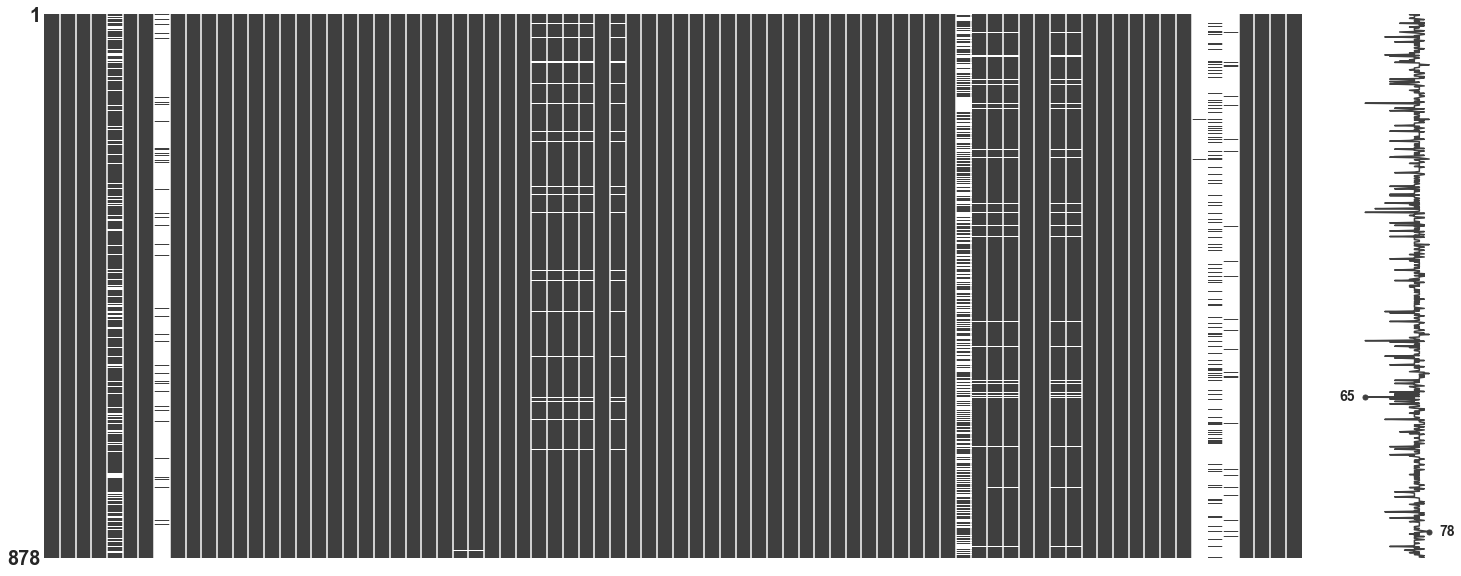

In [15]:
msno.matrix(test_df);

### 4.3. Train & Test Data Comparison

Here we'll compare below things between train and test dataset.
- Data Type
- Null values
- Data Distribution

### 4.3.1. Data Type Comparison
Comparing `train` and `test` there is some uncommon types but this does not affect analysis

In [16]:
train_dtype.shape

(81,)

In [17]:
train_dtype.drop(columns='SalePrice').shape

(81,)

In [18]:
train_dtype.shape

(81,)

In [19]:
len(train_dtype)

81

In [20]:
train_dtype = train_dtype.drop('SalePrice')
train_dtype.compare(test_dtype)

,self,other
BsmtFin SF 1,float64,int64
BsmtFin SF 2,float64,int64
Bsmt Unf SF,float64,int64
Total Bsmt SF,float64,int64
Bsmt Full Bath,float64,int64
Bsmt Half Bath,float64,int64
Garage Cars,float64,int64
Garage Area,float64,int64


### 4.3.2. Null Value Comparison
Created comprehensive list of parameters that may need to remove values if any of these variables is used as a predictor. Although none of these variables may be used.

In [21]:
train_null = train_df.isnull().sum().drop('SalePrice')
test_null = test_df.isnull().sum()
train_null.compare(test_null).sort_values('self',ascending=False)

,self,other
Pool QC,2042.0,874.0
Misc Feature,1986.0,837.0
Alley,1911.0,820.0
Fence,1651.0,706.0
Fireplace Qu,1000.0,422.0
Lot Frontage,330.0,160.0
Garage Cond,114.0,45.0
Garage Qual,114.0,45.0
Garage Finish,114.0,45.0
Garage Yr Blt,114.0,45.0


### 4.3.3. Distribution Comparison

In [22]:
train_df['Bsmt Cond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po', 'Ex'], dtype=object)

In [23]:
numeric_feat =[col for col in train_df.columns if train_df[col].dtypes != 'O']
discrete_feat = [col for col in numeric_feat if len(train_df[col].unique())<25 and col not in ['Id']]
continuous_feat = [col for col in numeric_feat if col not in discrete_feat and col not in ['Id','PID']]
categorical_feat = [col for col in train_df.columns if train_df[col].dtypes == 'O']

In [24]:
combined_df = pd.concat([train_df,test_df],axis=0)

In [25]:
combined_df['Label'] = combined_df['SalePrice'].apply(lambda x: 'train' if x > 0 else 'test')

In [26]:
print(combined_df[['Yr Sold','Garage Yr Blt']].loc[[1699,1885]])

      Yr Sold  Garage Yr Blt
1699     2007         2207.0
1885     2007         2008.0


In [27]:
print("Total Number of Numeric features:\t",len(numeric_feat))
print("  Number of ID features:\t",2)
print("  Number of discrete features:\t",len(discrete_feat))
print("  Number of continuous features:", len(continuous_feat))
print("Total Number of Categorical features:\t",len(categorical_feat))

Total Number of Numeric features:	 39
  Number of ID features:	 2
  Number of discrete features:	 16
  Number of continuous features: 21
Total Number of Categorical features:	 42


#### 4.3.3.1. Distribution Comparison - Discrete
In general we expect train to be about 2.33 times test in all counts for all catergories to ensure a relatively stratefied set of results.

['MS Subclass'] is the type of house though it is numerical

['TotRms AbvGrd', 'Overall Qual'] have a normal looking distribution

['MS SubClass', 'age', 'garage_age'] are left-bound

['Yr Sold'] is almost uniform

['Mo Sold'] however is not even implying some internal seasonality (june, july are summer months with higher sales), with left skew

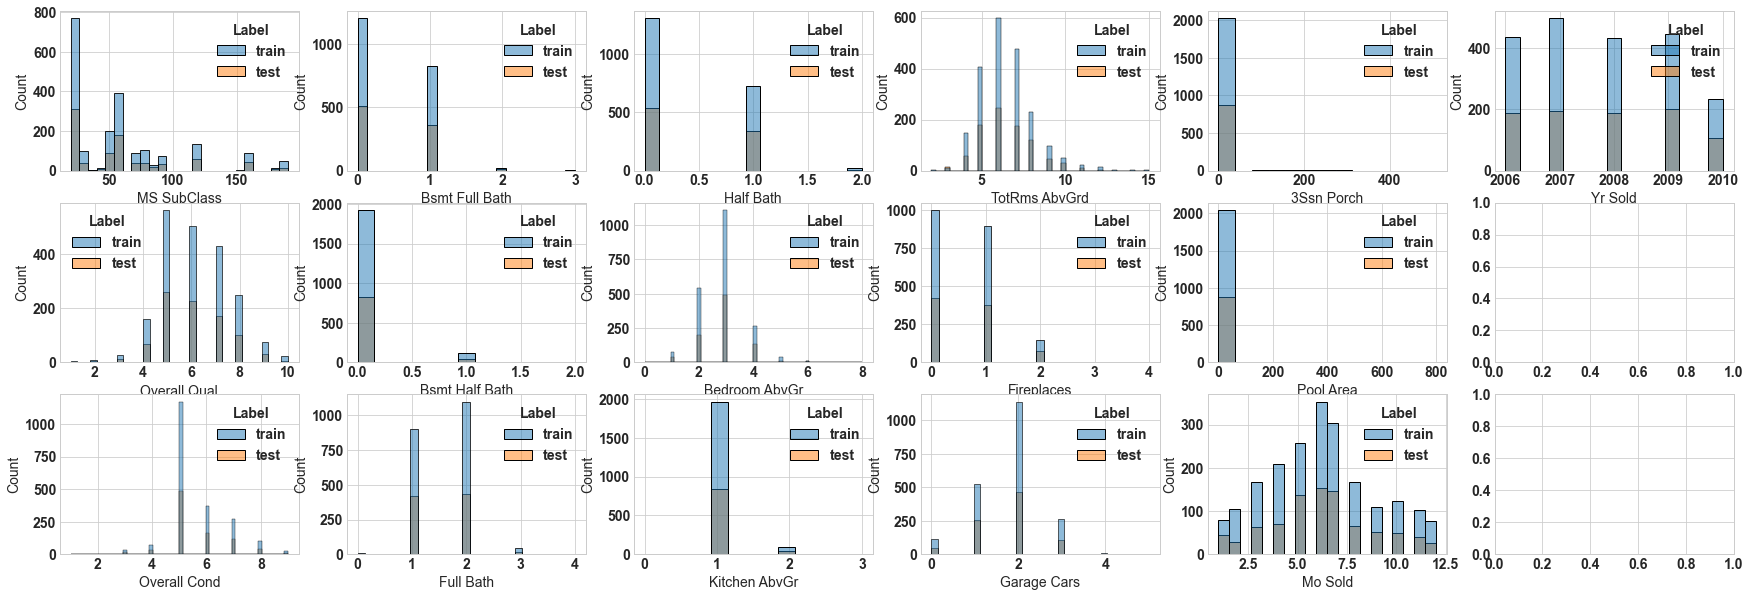

In [28]:
f, axes = plt.subplots(3,6 , figsize=(30, 10), sharex=False)
for i, feature in enumerate(discrete_feat):
    sns.histplot(data=combined_df, x = feature, hue="Label",ax=axes[i%3, i//3])

#### 4.3.3.2. Distribution Comparison - Continuous
In general we expect train to be about 2.33 times test in all counts for all catergories to ensure a relatively stratefied set of results

In [29]:
print(f'expected ratio between train to test: {len(train_df)/len(test_df):.2f}')

expected ratio between train to test: 2.34


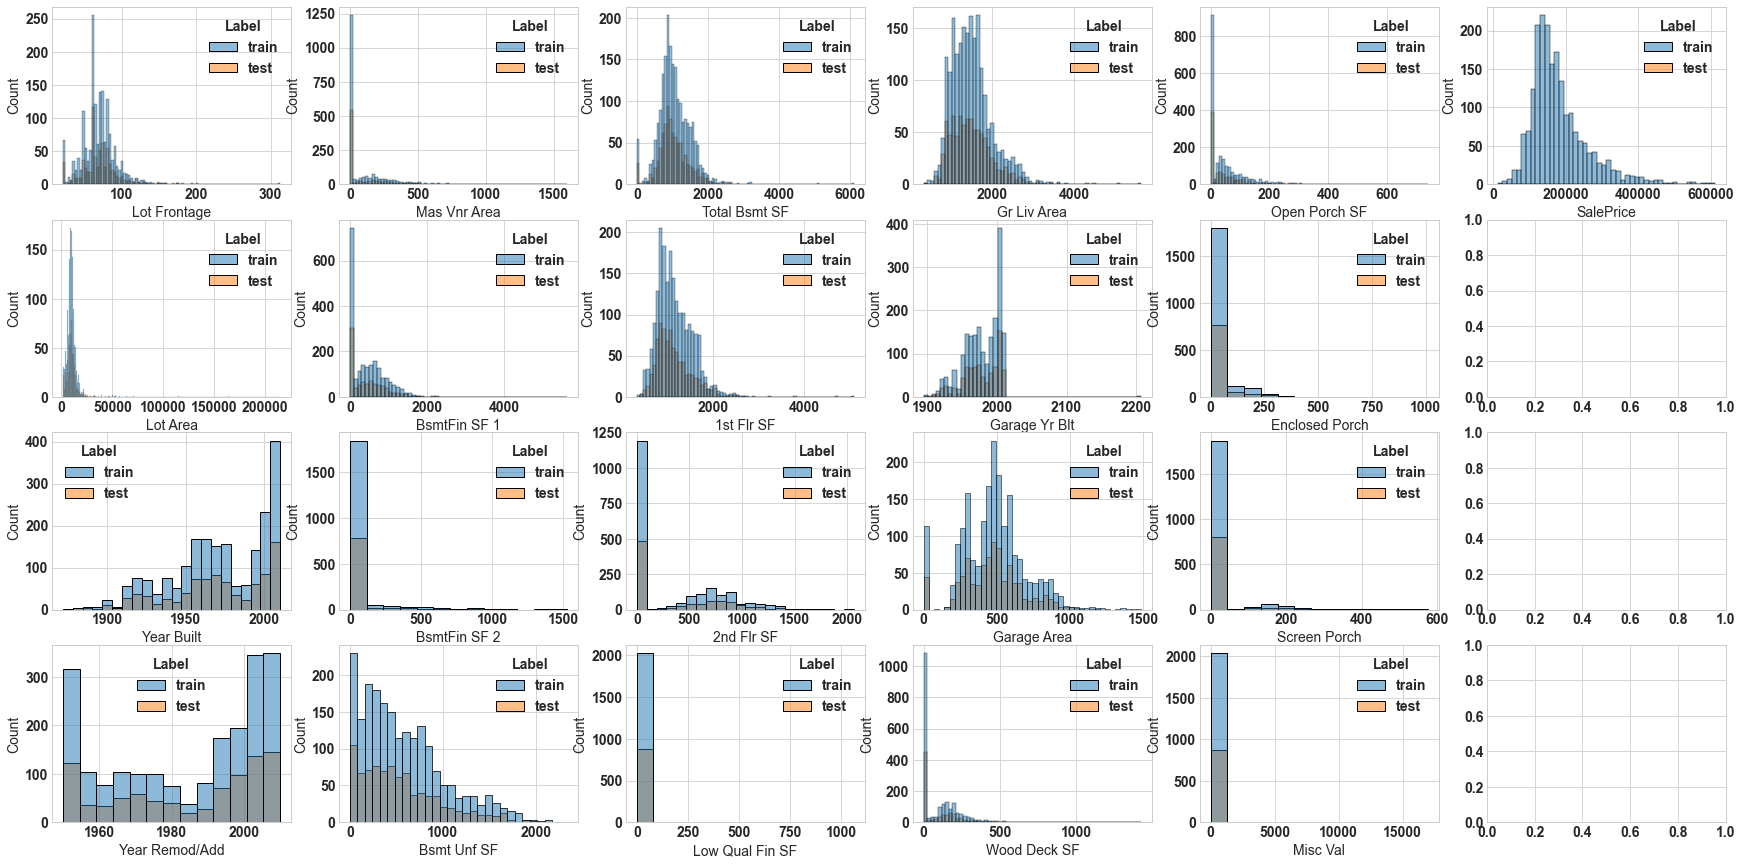

In [30]:
f, axes = plt.subplots(4,6 , figsize=(30, 15), sharex=False)
for i, feature in enumerate(continuous_feat):
    sns.histplot(data=combined_df, x = feature, hue="Label",ax=axes[i%4, i//4]) 

#### 4.3.3.3. Linearity Check
Many variable are independent - in random parttern or a discrete pattern with no slope.
Otherwise variables (e.g. year built) have a relationship but with no practical meaning.

['Gr Liv Area', 'Total Bsmt SF', 'Garage Area', 'age', 'garage_age', '1st Flr SF', 'Total Bsment SF', 'Garage Area', 'age', 'Overal Qual', 'TotRms AbvGrd'] with scatterplot with apparent relationship, though not exhaustive list but some of these variables need to be amended to remove outliers

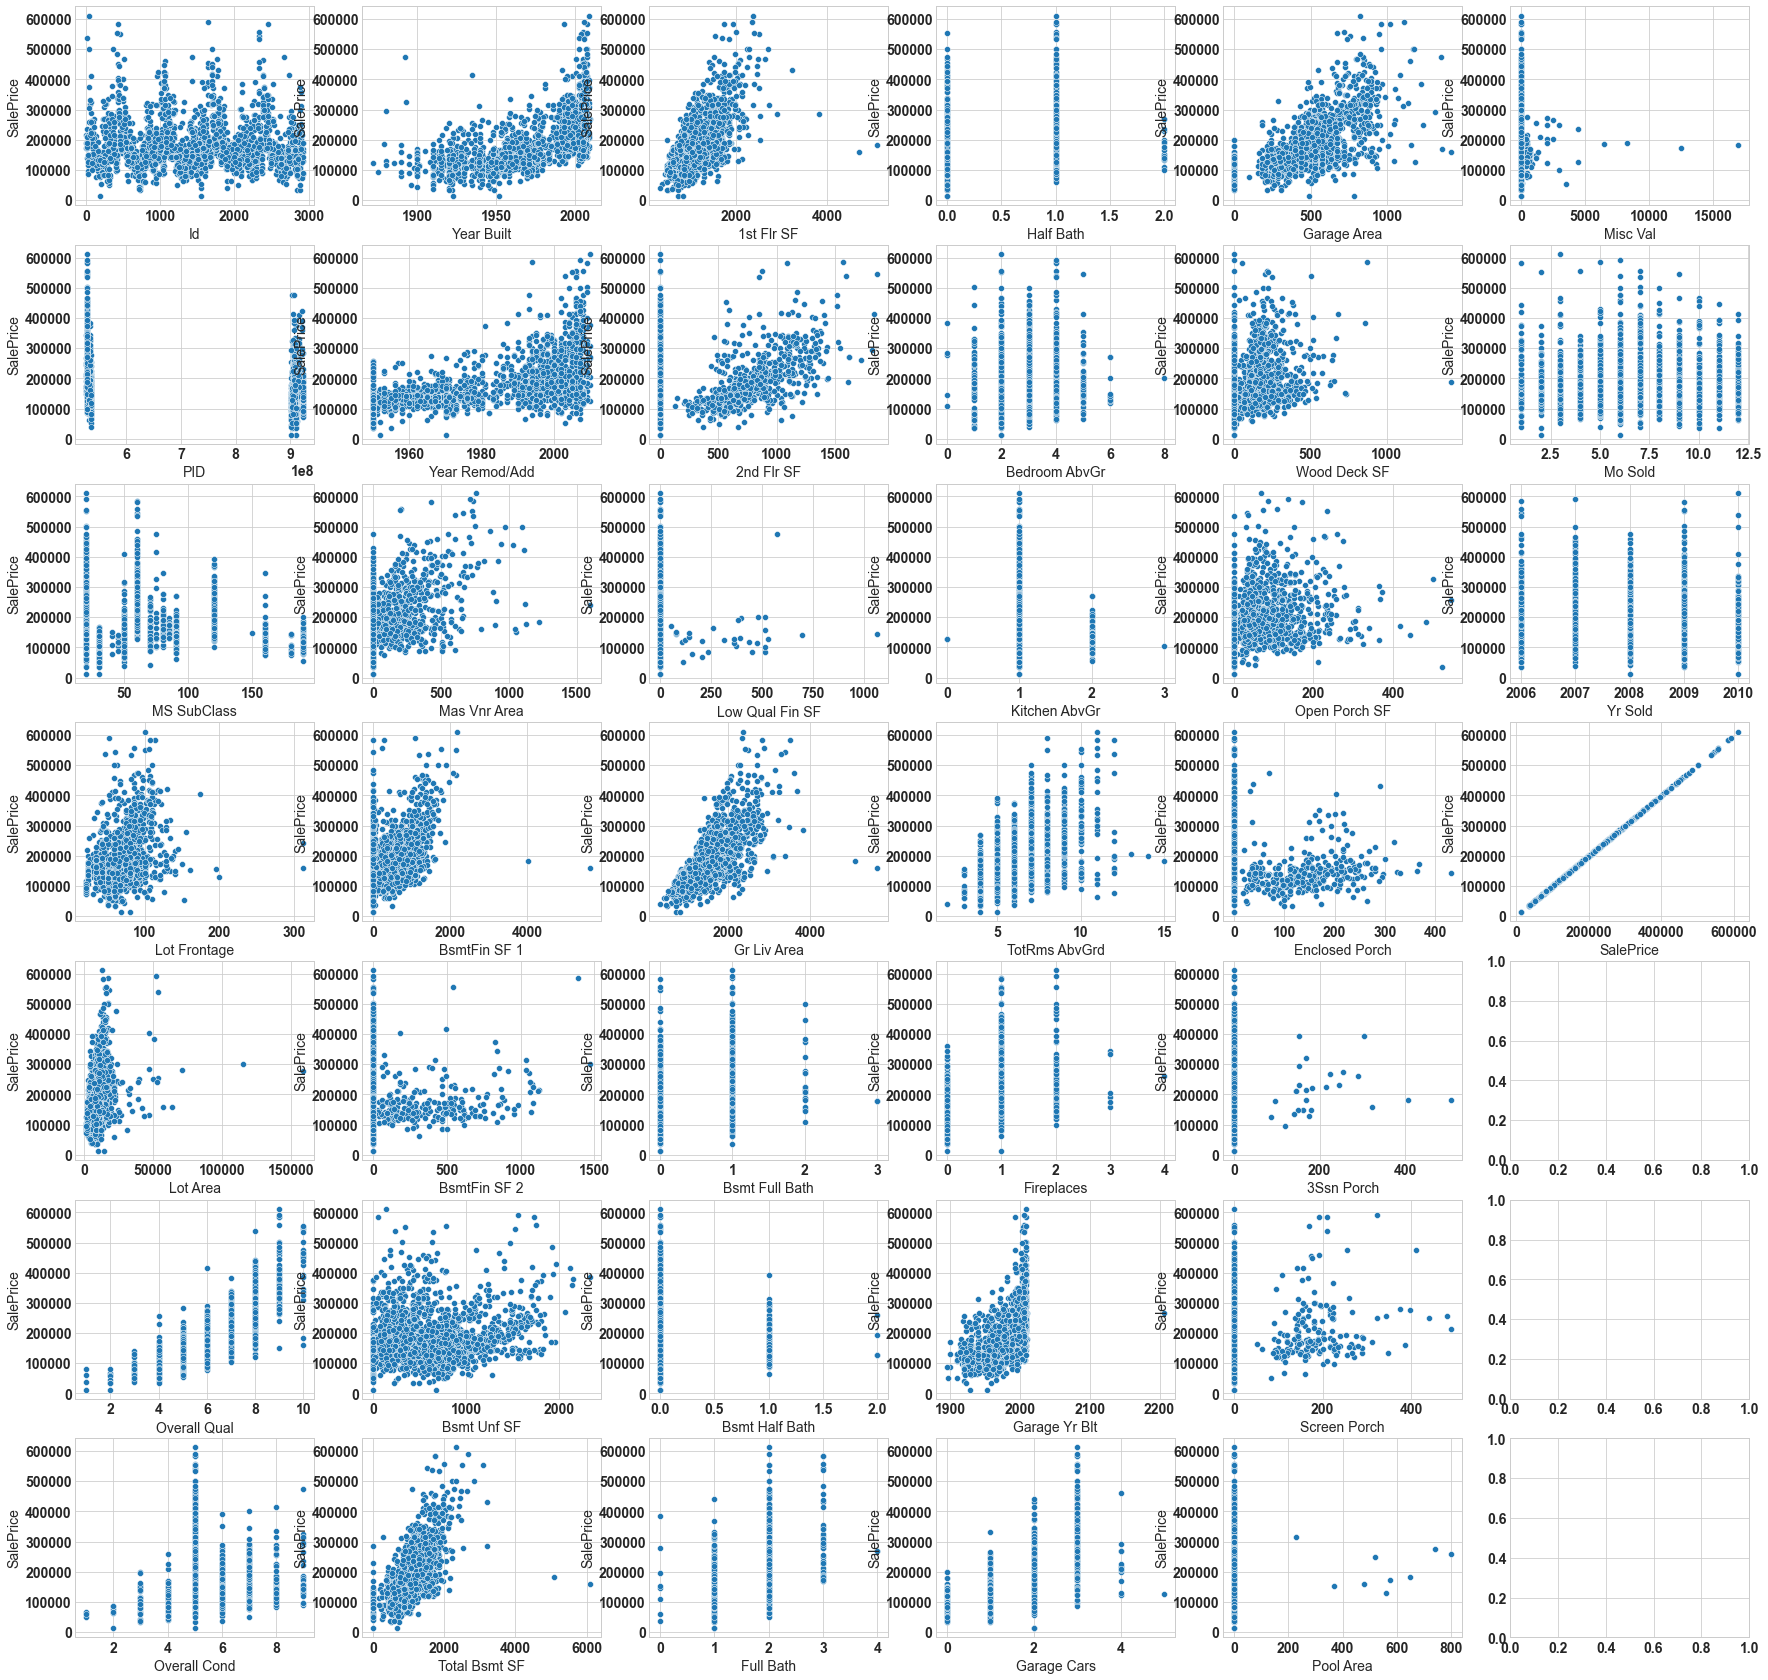

In [31]:
f, axes = plt.subplots(7,6 , figsize=(30, 30), sharex=False)
for i, feature in enumerate(numeric_feat):
    sns.scatterplot(data=combined_df, x = feature, y= "SalePrice",ax=axes[i%7, i//7])

#### 4.3.3.4. Categorical Distribution Comparison 
Here it is the easy form to check values that are not within 'data description' file.

We continue to compare train to be about 2.34 times test in all counts for all catergories to ensure a relatively stratefied set of results. ['Pool QC'] has 'ex' greater in test than train but this is also highest missing data (recommend to drop column).

['Roof Matl','Street','Condition 2','Utilities','Heating'] variables are shortlisted becuase any one value count is more than a count of 2,000.

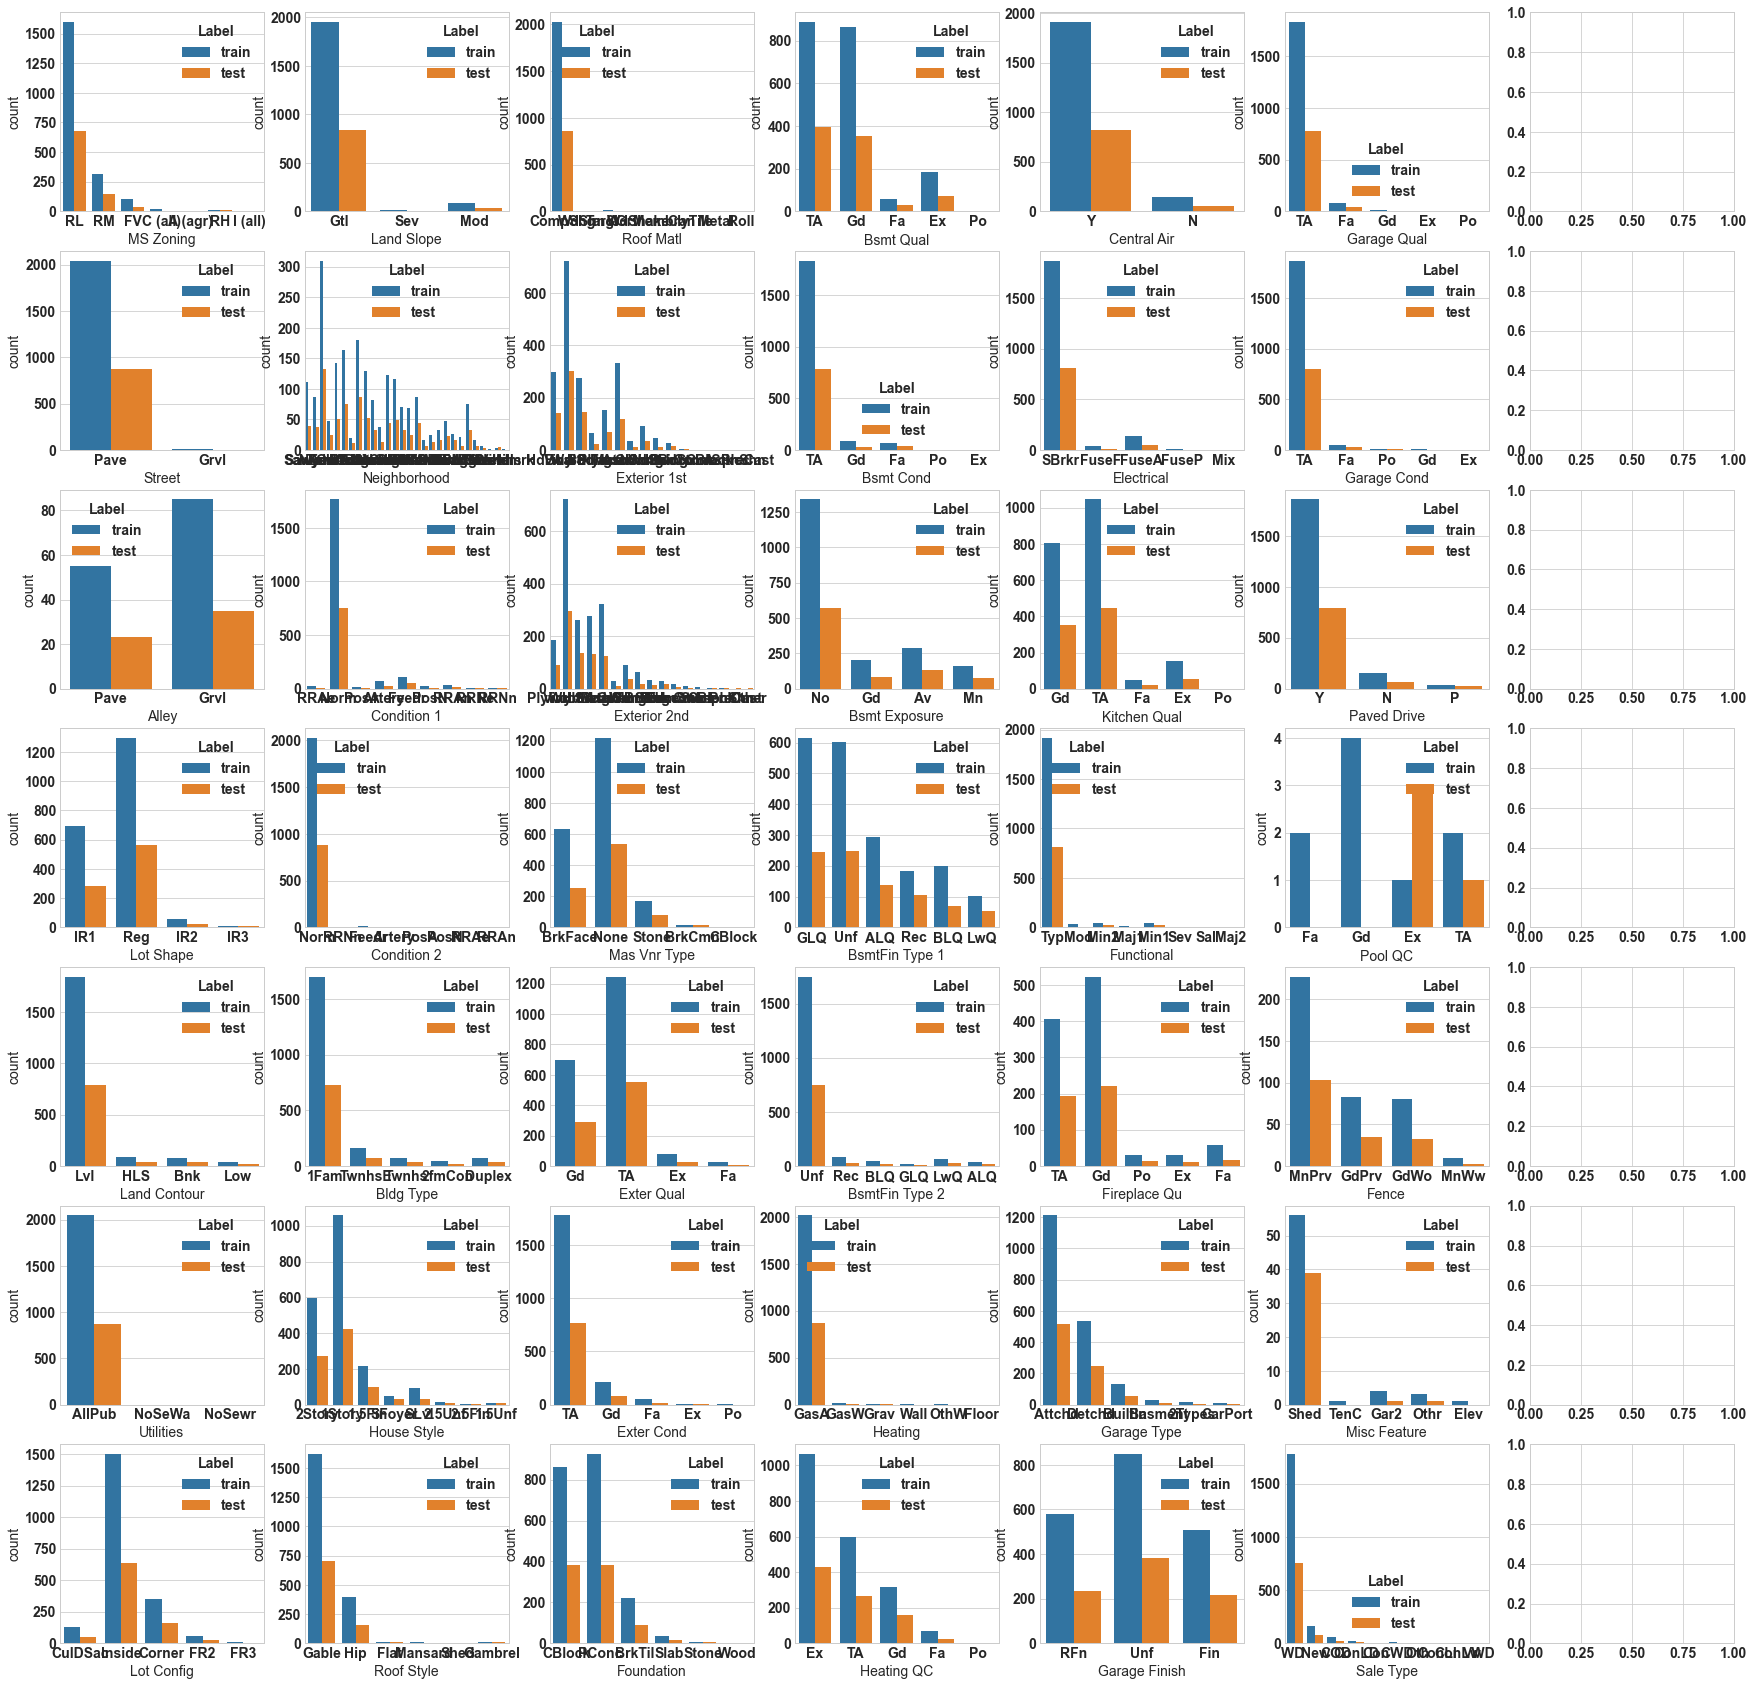

In [32]:
f, axes = plt.subplots(7,7 , figsize=(30, 30), sharex=False)
for i, feature in enumerate(categorical_feat):
    sns.countplot(data = combined_df, x = feature, hue="Label",ax=axes[i%7, i//7])

In [33]:
for i, feature in enumerate(categorical_feat):
    if train_df[feature].value_counts()[0]>2000:
        print(feature)

Street
Utilities
Condition 2
Roof Matl
Heating


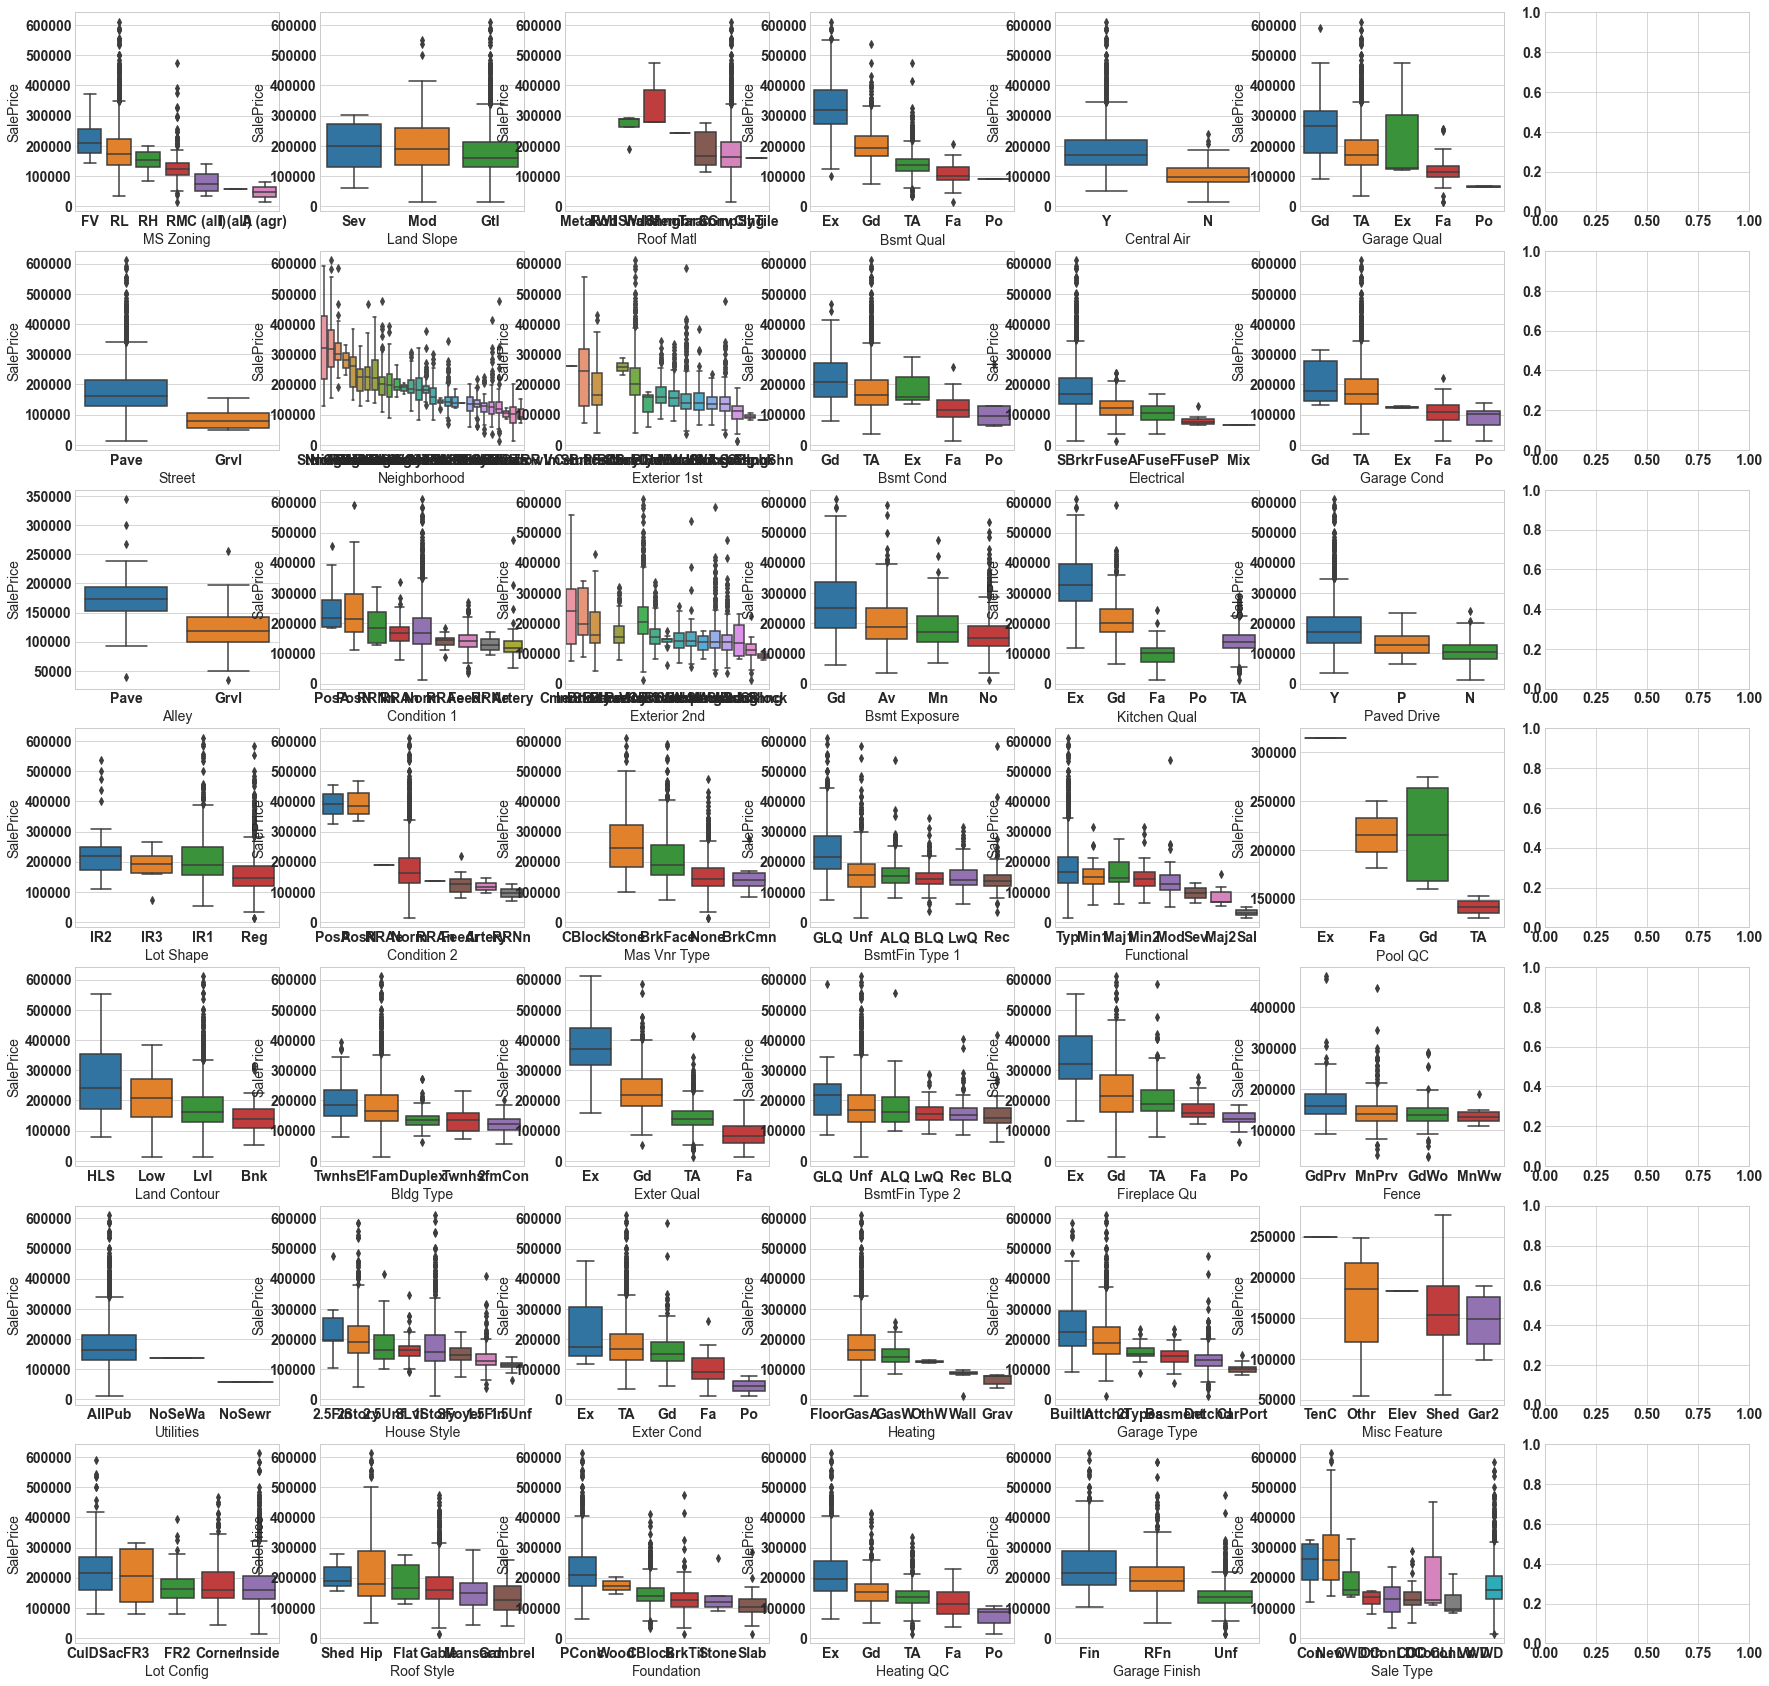

In [34]:
f, axes = plt.subplots(7,7 , figsize=(30, 30), sharex=False)
for i, feature in enumerate(categorical_feat):
    sort_list = sorted(combined_df.groupby(feature)['SalePrice'].median().items(), key= lambda x:x[1], reverse = True)
    order_list = [x[0] for x in sort_list ]
    sns.boxplot(data = combined_df, x = feature, y = 'SalePrice', order=order_list, ax=axes[i%7, i//7])
plt.show()

['Neighborhood'] also appears to have significant distribution of SalesPrice across its values.

### 4.4. Find Suitable value for Numerical missing values


### 4.5. Temporal Variable Analysis

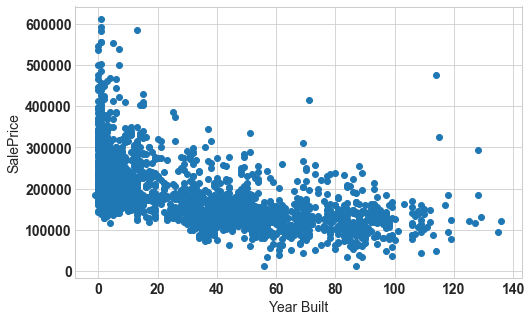

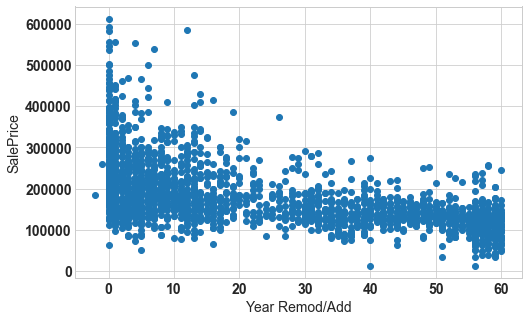

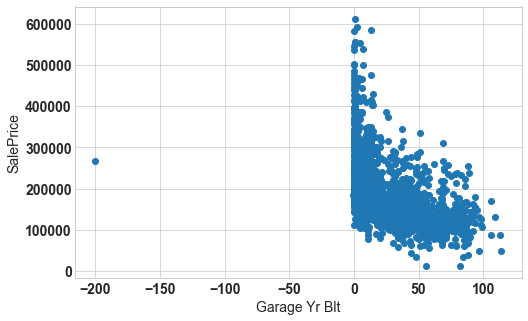

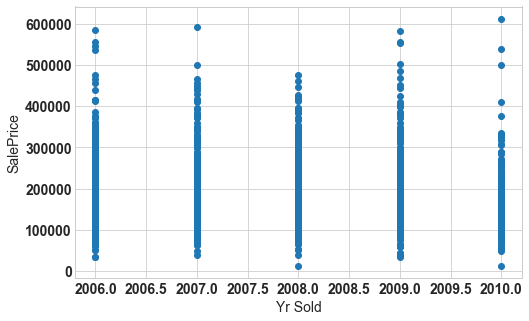

In [35]:
year_feature = [col for col in combined_df.columns if 'Yr' in col or 'Year' in col]
year_feature
for fet in year_feature:
    if fet != 'Yr Sold':
        hs = combined_df.copy()
        hs[fet] = hs['Yr Sold'] - hs[fet]
        plt.scatter(hs[fet],hs['SalePrice'])
        plt.xlabel(fet)
        plt.ylabel('SalePrice')
        plt.show()
plt.scatter(hs['Yr Sold'],hs['SalePrice'])
plt.xlabel('Yr Sold')
plt.ylabel('SalePrice')
plt.show()

In [36]:
for i,x in enumerate(combined_df['Yr Sold']-combined_df['Garage Yr Blt']):
    if x<0:
        print(i)

1699
1885


In [37]:
combined_df.loc[1699,'Garage Yr Blt'] = 2007
combined_df.loc[1885,'Garage Yr Blt'] = 2007

Text(0.5, 1.0, 'House price vs YearSold')

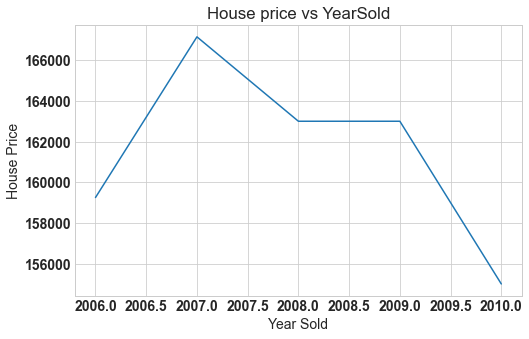

In [38]:
combined_df.groupby('Yr Sold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('House Price')
plt.title('House price vs YearSold')

### 4.6. Data Correlation
Garage parameters are highly correlated.
year built and garage year built is highly correlated.
rooms and living areas is highly correlated.

all above which may cause multicollinearity

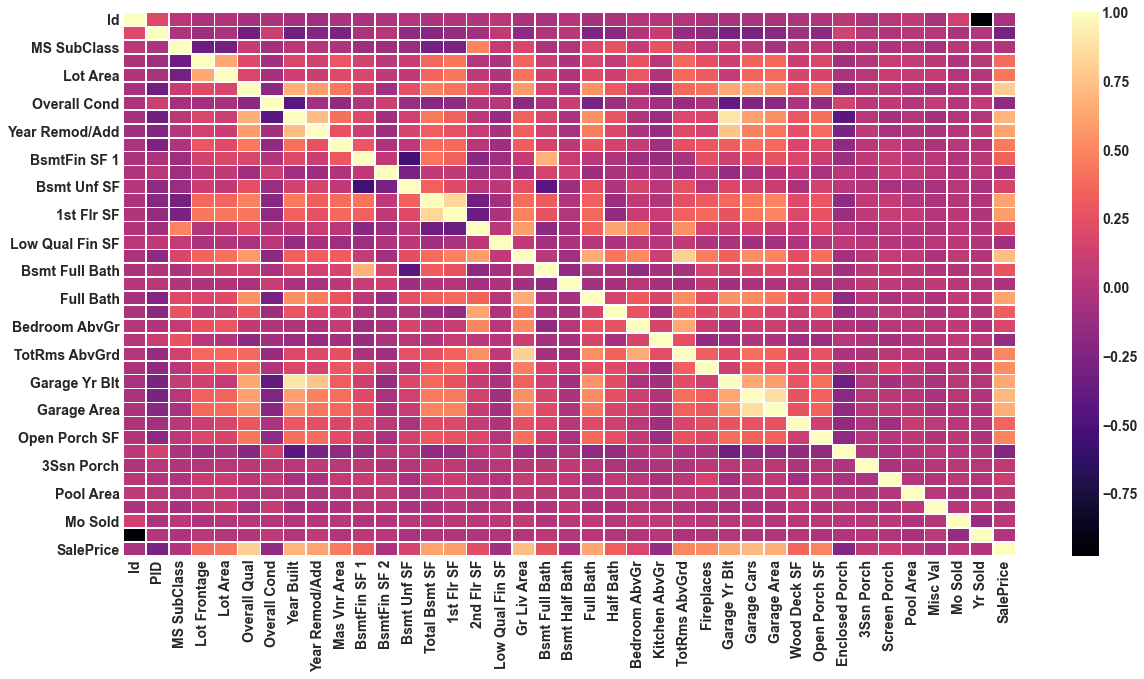

In [39]:
training_corr = train_df.corr(method='spearman')
plt.figure(figsize=(20,10))
sns.heatmap(training_corr, cmap="magma", linewidths=.5);

## 5. Feature Engineering

### 5.1. Drop Columns or Rows

Missing values will be resolved by picking predictors which have significant data.

_['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu',
       'Lot Frontage', 'Garage Cond', 'Garage Qual', 'Garage Finish',
       'Garage Yr Blt', 'Garage Type', 'Bsmt Exposure', 'BsmtFin Type 2',
       'BsmtFin Type 1', 'Bsmt Qual', 'Bsmt Cond', 'Mas Vnr Area',
       'Mas Vnr Type']_ 
       
Columns are dropped based on the following:
- there is a significant quantity of missing values (assumed threshhold: > 5 training values)
- the remaining variables are related and likely to have predictive influence on response even if this vatiable is not considered

18 **columns** are removed from `combined_df` because they have more that 5 entries missing.

Consideration at this point that 'Quality' data sets are harder to be objective and will not be considered significant in the first iterations of the model but may be considered for fine tuning if necessary
       
---

In [40]:
isnull_set = train_null.compare(test_null).sort_values('self',ascending=False)
drop_columns = list(isnull_set[isnull_set['self']>5].index)
#drop_columns.append('Id')
drop_columns.append('PID')

In [41]:
print("Number of columns before dropping:\t",len(combined_df.columns))
print("Number of dropping columns:\t\t",len(drop_columns))
combined_df.drop(columns=drop_columns, inplace=True, errors='ignore')
print("Number of columns after dropping:\t",len(combined_df.columns))

Number of columns before dropping:	 82
Number of dropping columns:		 19
Number of columns after dropping:	 63


### 5.2 Temporal Variable Change



In [42]:
for feature in ['Year Built','Year Remod/Add']:
    combined_df[feature]=combined_df['Yr Sold']-combined_df[feature]

In [43]:
#there is corr between rms and living area. might have to be removed later
combined_df.corr()['SalePrice'].drop('SalePrice').sort_values(key=lambda x:abs(x),ascending=False)[:12]

Overall Qual      0.800207
Gr Liv Area       0.697038
Garage Area       0.650270
Garage Cars       0.648220
Total Bsmt SF     0.628925
1st Flr SF        0.618486
Year Built       -0.571881
Year Remod/Add   -0.551716
Full Bath         0.537969
TotRms AbvGrd     0.504014
Fireplaces        0.471093
BsmtFin SF 1      0.423519
Name: SalePrice, dtype: float64

### 5.3 Fill Missing Values
missing values 1 or 2 missing entries per column so we assume they are missing all at random and are dropped instead.

- numerical nulls set price to 0 (except SalePrice)
- Electrical is categorical and set to mode
 
 0 **rows** removed 
 
'*'alternative approach to only drop train entries then do no touch test. After testing, it is found that imputing values is more effective

'*' considered finding other value in `Electrical` but is not available

In [44]:
[col for col in combined_df.columns if combined_df[col].isnull().sum() > 0]

['BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Electrical',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Garage Cars',
 'Garage Area',
 'SalePrice']

In [45]:
null_features_numerical = ['Bsmt Full Bath','Bsmt Half Bath','Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 2','BsmtFin SF 1','Garage Cars','Garage Area']

In [46]:
for col in null_features_numerical:
    if col not in drop_columns:
        combined_df[col] = combined_df[col].fillna(0.0)

combined_df['Electrical'] = combined_df['Electrical'].fillna(combined_df['Electrical'].mode()[0])        

In [47]:
before_drop=len(combined_df)
print("Number of rows before dropping:\t",before_drop)
drop_rows = ['Bsmt Half Bath','Bsmt Full Bath','Electrical','Garage Cars','Garage Area','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF']
combined_df.drop(list(combined_df[combined_df.drop(columns='SalePrice').isnull().any(axis=1)].index[:-1]),inplace=True)
print("Number of rows dropped:\t\t",before_drop-len(combined_df))
print("Number of rows after dropping:\t",len(combined_df))

Number of rows before dropping:	 2929
Number of rows dropped:		 0
Number of rows after dropping:	 2929


### 5.4 Convert Numerical feature to Categorical
some of the numeric features can be grouped as
- Area
- Quality / Condition
    - assumed to be linearly related
- Type of house feature
    - _house type as seen in data description is not linear and will be changed to categorical_
- Quantity of house feature
- Year
- Price

In [48]:
convert_list = ['MS SubClass']
combined_df['MS SubClass'] = combined_df['MS SubClass'].astype('str')

### 5.5. Apply PowerTransformer to columns
- We saw in distribution of continuous features that some features are not linear towards target feature. So we need to transform this.
- Lets check the skewness of all distributions
- after reviewing the following is shortlisted for log transformation
    ['Gr Liv Area','Lot Area', 'Garage Area','1st Flr SF', '2nd Flr SF', 'Enclosed Porch','BsmtFin SF 1', 'Total Bsmt SF', 'Bsmt Unf SF']
- 'yeo-johnson' and 'box-cox' method is used

In [49]:
numeric_feat =[col for col in combined_df.columns if combined_df[col].dtypes != 'O']
discrete_feat = [col for col in numeric_feat if len(combined_df[col].unique())<25]
continuous_feat = [col for col in numeric_feat if col not in discrete_feat]

# check the skew of all numerical features
skewed_feats = combined_df[continuous_feat].skew()
print('\n Skew in numerical features: \n')
skewness_df = pd.DataFrame({'Skew' : skewed_feats}).sort_values('Skew',ascending=False)
print(skewness_df)


 Skew in numerical features: 

                      Skew
Misc Val         21.996036
Lot Area         12.899157
Low Qual Fin SF  12.116056
3Ssn Porch       11.401807
BsmtFin SF 2      4.139978
Enclosed Porch    4.013674
Screen Porch      3.956673
Open Porch SF     2.525565
Wood Deck SF      1.843810
SalePrice         1.557551
1st Flr SF        1.449236
BsmtFin SF 1      1.410038
Gr Liv Area       1.220100
Total Bsmt SF     1.132228
Bsmt Unf SF       0.923750
2nd Flr SF        0.865112
Year Built        0.603031
Year Remod/Add    0.450886
Garage Area       0.240043
Id                0.000660


In [50]:
log_list = ['Gr Liv Area','Lot Area', 'Garage Area','1st Flr SF', '2nd Flr SF', 'Enclosed Porch','BsmtFin SF 1', 'Total Bsmt SF', 'Bsmt Unf SF']

In [51]:
for col in log_list:
    if col in ['Lot Area', '1st Flr SF']:
        power = PowerTransformer(method='box-cox', standardize=True)
        combined_df[[col]] = power.fit_transform(combined_df[[col]])
    else:
        power = PowerTransformer(method='yeo-johnson', standardize=True)
        combined_df[[col]] = power.fit_transform(combined_df[[col]]) # fit with combined_data to avoid overfitting with training data?

print('Number of skewed numerical features got transform : ', len(log_list))

Number of skewed numerical features got transform :  9


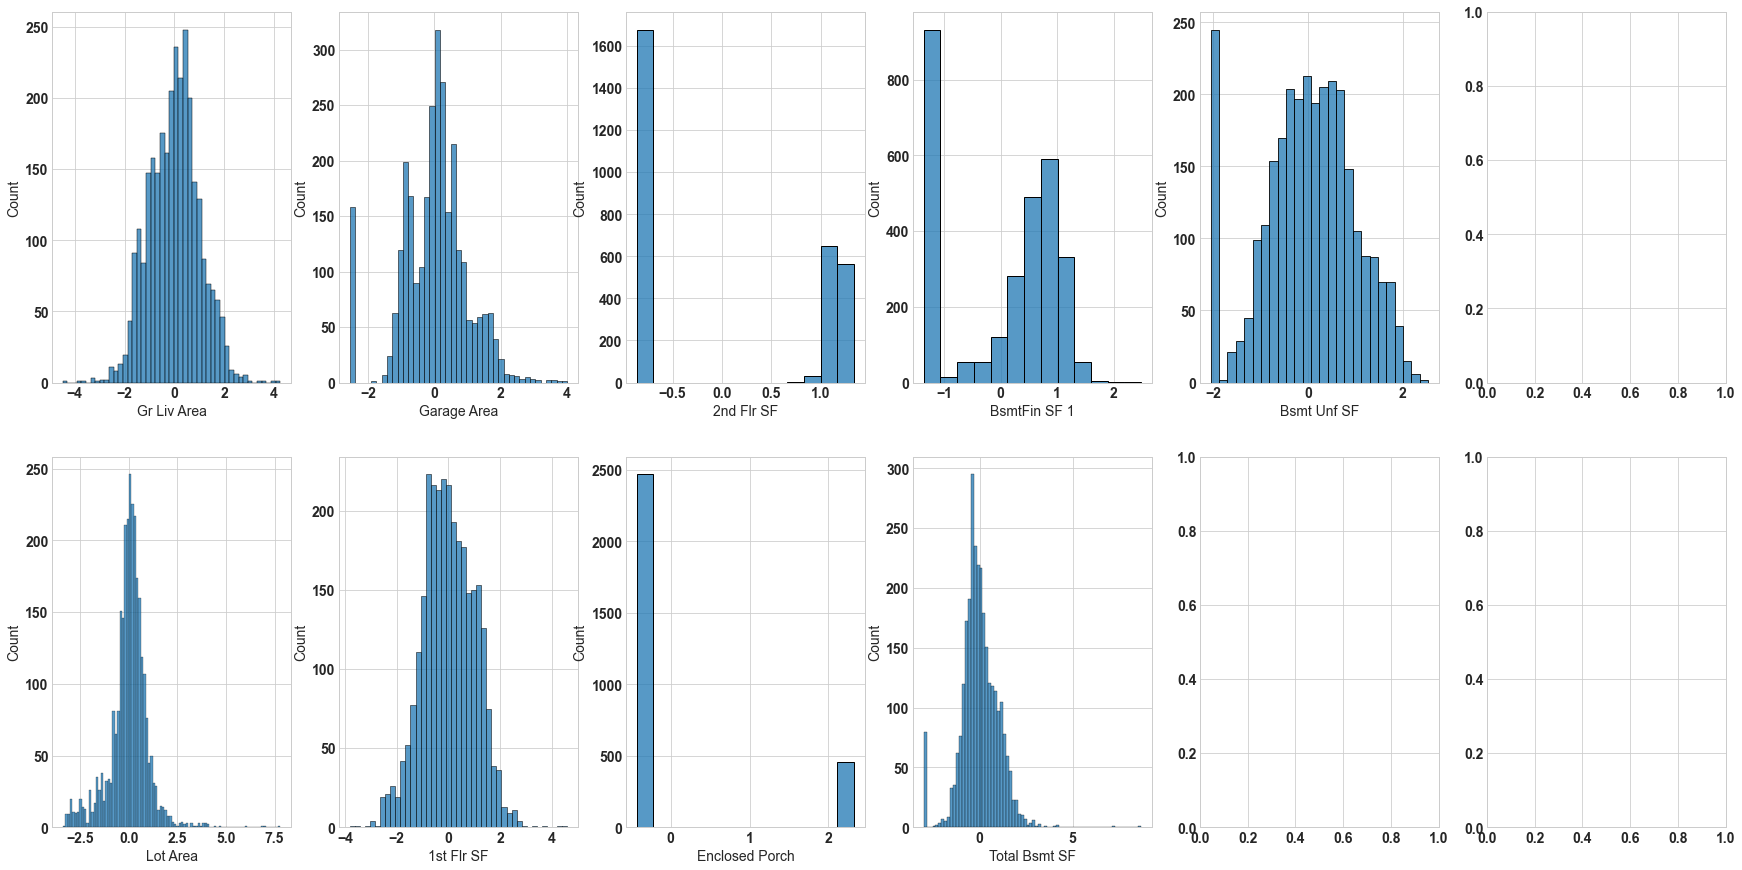

In [52]:
f, axes = plt.subplots(2,6 , figsize=(30, 15), sharex=False)
for i, feature in enumerate(log_list):
    sns.histplot(data=combined_df, x = feature,ax=axes[i%2, i//2])

### 5.6 Regroup Features¶
regroups features to remove unnecessary dummy variables. considering [4.3.3.4. Categorical Distribution Comparison](#4.3.3.4.-Categorical-Distribution-Comparison). 'Type'  are still relevant since they are binary. However discretionary quality variables with  namely with  values:
       Ex	Excellent  
       Gd	Good  
       TA	Average/Typical  
       Fa	Fair  
       Po	Poor  
have few 'Fa' and 'Po' counts so these are consolidated. affected variables 

['Kitchen Qual','Heating QC','Exter Cond', 'Exter Qual']

Exclusions
['Exter Cond'] is evenly split into a distribution with 'TA' as greatest, we assume it is normal distribution so there is significance in 'Fa' and 'Po'
['Exter Qual'] has no 'Po' so does not need to be regrouped

Remainder to regroup is ['Kitchen Qual','Heating QC']

In [53]:
combined_df['Kitchen Qual'] = combined_df['Kitchen Qual'].apply(lambda x: 'Fa/Po' if x in ['Fa','Po'] else x)
combined_df['Heating QC'] = combined_df['Heating QC'].apply(lambda x: 'Fa/Po' if x in ['Fa','Po'] else x)

### 5.7 Get-Dummies

starting with 62 columns >`get_dummies`> 241 columns

In [54]:
combined_df = pd.get_dummies(combined_df).reset_index(drop=True)

### 5.8 Get X and y

In [55]:
combined_df.to_csv('./datasets/combined_df.csv',index=False)

In [56]:
combined_df = pd.read_csv('./datasets/combined_df.csv')

In [57]:
coef_index = combined_df.columns.drop(['Id','Label_test','Label_train','SalePrice'])
new_train_data = combined_df.loc[combined_df['Label_train']==1].drop(columns=['Id','Label_test','Label_train'])
new_test_data = combined_df.loc[combined_df['Label_test']==1].drop(columns=['Id','Label_test','Label_train'])
X_train = new_train_data.drop('SalePrice', axis=1)
y_train = np.log1p(new_train_data['SalePrice'].values.ravel())
X_test = new_test_data.drop('SalePrice', axis=1)

In [58]:
pre_precessing_pipeline = make_pipeline(RobustScaler(),
                                       )

X_train = pre_precessing_pipeline.fit_transform(X_train)
X_test = pre_precessing_pipeline.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(2051, 238)
(878, 238)


## 6. Model Development
6.0 established the OLS Baseline as a linear model with `Gr Liv Area` and `Year Built`. These are considered because in most property listings these are the two popular value metrics considering capacity and living condition. 

6.1 to 6.3 Linear Regression is applied across entire train data set. three linear models: OLS, RidgeCV, LassoCV are used. These three use linear regression as principle driver but vary in considering overfitting.

In deciding the final model the below two files are used to obtain metrics to choose the best model ***RidgeCV***.

--- 

file: `Train_Test_Split+MSE_Comparison.ipynb`
- file is used to perform Train-test-split with K-fold validations to determine expecteded scores for a given model
- Then MSE comparison is used between models to find the model resulting in the lowest aggregate score ('neg_mean_squared_error')
Model with the *lowest and consistent mean CV score is chosen*. It is determined that ***RidgeCV*** is the most effective model

'*' Elasticnet is tested and it tended to full lasso regularisation. this is interesting because even though ElasticNet chooses the l1_ratio with the best score RidgeCV still has a better score than LassoCV. ElasticNet is dropped from further analysis.

--- 

file: `Polynomial_test.ipynb`
- analysis involved observing `Gr Liv Area` and `Year Built` is squared
- MSE for train and test did not significantly improve implying overfitting improvedments
The above two terms are rejected for the chosen model

---

In [59]:
cv = KFold(n_splits=50, random_state=50, shuffle=True)

### 6.0 OLS Baseline

Create a baseline with above `Gr Liv Area` and `Year Built`. 

#### 6.0.1 OLS Baseline fit

In [60]:
ols=LinearRegression()
ols.fit(new_train_data[['Gr Liv Area','Year Built']], new_train_data['SalePrice'])

LinearRegression()

In [61]:
ols_scores = cross_val_score(ols, new_train_data[['Gr Liv Area','Year Built']], new_train_data['SalePrice'], cv=cv, n_jobs=-1,scoring='neg_mean_squared_error')

#### 6.0.2 OLS Baseline Evaluating Model

In [62]:
ols_train_score = ols.score(new_train_data[['Gr Liv Area','Year Built']], new_train_data['SalePrice'])
print(f'ols train R^2:\t\t {ols_train_score:.4f}')

y_pred = ols.predict(new_train_data[['Gr Liv Area','Year Built']])
ols_mse = mean_squared_error(new_train_data['SalePrice'], y_pred)
print(f'train rmse\t\t{ols_mse**.5:,.0f}')

ols train R^2:		 0.6304
train rmse		48,172


In [63]:
ols_coef = pd.DataFrame(ols.coef_, index = ['Gr Liv Area','Year Built'])
ols_coef.columns = ['ols_coef']
ols_coef.sort_values(by='ols_coef',key=lambda x: abs(x),ascending=False)[:20]

,ols_coef
Gr Liv Area,45994.399498
Year Built,-1054.254777


#### 6.0.3 Benchmark Submission
Coefficients implylarger and younger houses are more expensive which is a generally accepted understanding of house prices. However these variables are definitely not sufficient. Districts and neighbourhoods would be another consideration because for property its all about *'location location location'*. Starting for a more inclusive model would be preferential

In [64]:
y_pred= ols.predict(new_test_data[['Gr Liv Area','Year Built']])
submission = pd.DataFrame({'Id': combined_df.loc[combined_df['Label_test']==1]['Id'],
                   'SalePrice': y_pred})
submission.to_csv('./datasets/sample_sub_reg.csv',index=False)

### 6.1 OLS

#### 6.1.1 OLS fit

In [65]:
ols=LinearRegression()
ols.fit(X_train, y_train)

LinearRegression()

In [66]:
ols_scores = cross_val_score(ols, X_train, y_train, cv=cv, n_jobs=-1,scoring='neg_mean_squared_error')

#### 6.1.2 OLS Evaluating Model
OLS outperforms baseline in R^2 and RMSE

In [67]:
ols_train_score = ols.score(X_train,y_train)
print(f'ols train R^2:\t\t {ols_train_score:.4f}')

y_pred = np.expm1(ols.predict(X_train))
ols_mse = mean_squared_error(np.expm1(y_train), y_pred)
print(f'train rmse\t\t{ols_mse**.5:,.0f}')

ols train R^2:		 0.9376
train rmse		18,731


In [68]:
ols_coef = pd.DataFrame(ols.coef_, index = coef_index)
ols_coef.columns = ['ols_coef']
ols_coef.sort_values(by='ols_coef',key=lambda x: abs(x),ascending=False)[:20]

,ols_coef
Roof Matl_ClyTile,-1.538557
MS Zoning_A (agr),-0.578658
Exterior 1st_CBlock,0.514217
Functional_Sal,-0.440432
Roof Matl_Membran,0.422158
Neighborhood_GrnHill,0.415172
Exterior 2nd_CBlock,-0.406900
Roof Matl_WdShngl,0.346628
Condition 2_RRAe,0.335783
Roof Matl_WdShake,0.278733


### 6.2 Ridge

#### 6.2.1 Ridge fit
optimal alpha is determined in `Train_Test_Split+MSE_Comparison.ipynb`

In [69]:
ridge_cv = RidgeCV(cv=5,alphas=[0.125, 1.25, 12.5])
ridge_cv_scores = cross_val_score(ridge_cv, X_train, y_train, cv=cv, n_jobs=-1,scoring='neg_mean_squared_error')

#### 6.2.2 Ridge Evaluating Model

In [70]:
ridge_cv.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.125,  1.25 , 12.5  ]), cv=5)

In [71]:
ridge_cv_score = ridge_cv.score(X_train,y_train)
print(f'ridge train R^2:\t\t {ridge_cv_score:.4f}')

y_pred = np.expm1(ridge_cv.predict(X_train))
ridge_cv_mse = mean_squared_error(np.expm1(y_train), y_pred)
print(f'train rmse\t\t{ridge_cv_mse**.5:,.0f}')

ridge train R^2:		 0.9242
train rmse		21,610


In [72]:
ridge_cv_coef = pd.DataFrame(ridge_cv.coef_, index = coef_index)
ridge_cv_coef.columns = ['ridge_coef']
ridge_cv_coef.sort_values(by='ridge_coef',key=lambda x: abs(x),ascending=False)[:20]

,ridge_coef
Gr Liv Area,0.148722
Overall Qual,0.114870
Functional_Sal,-0.097521
Roof Matl_ClyTile,-0.093763
Year Built,-0.090859
Functional_Typ,0.090066
Exterior 1st_BrkFace,0.079705
MS Zoning_C (all),-0.079077
Exter Cond_Po,-0.075408
MS Zoning_A (agr),-0.074900


### 6.3 Lasso
#### 6.3.1 Lasso fit
alpha is self-determining in LassoCV and is automatic

In [73]:
lasso_cv = LassoCV(cv=5)
lasso_cv_scores = cross_val_score(lasso_cv, X_train, y_train, cv=cv, n_jobs=-1,scoring='neg_mean_squared_error')

In [74]:
lasso_cv.fit(X_train, y_train)
print(f'Lasso alpha: {lasso_cv.alpha_}')

Lasso alpha: 0.0029715935987551113


#### 6.3.2 Lasso Evaluating Model

In [75]:
lasso_cv_score = lasso_cv.score(X_train, y_train)
print(lasso_cv_score)

lasso_cv_score_delta = lasso_cv_score-lasso_cv_scores.mean()
print(f'train-test score delta:\t {lasso_cv_score_delta/lasso_cv_score*100:.2f}%')

y_pred = np.expm1(lasso_cv.predict(X_train))
lasso_cv_mse = mean_squared_error(np.expm1(y_train), y_pred)
print(f'train rmse\t\t{lasso_cv_mse**.5:,.0f}')

0.8953812415910573
train-test score delta:	 102.25%
train rmse		27,599


In [76]:
lasso_cv_coef = pd.DataFrame(lasso_cv.coef_, index = coef_index)
lasso_cv_coef.columns = ['lasso_coef']
lasso_cv_coef.sort_values(by='lasso_coef',key=lambda x: abs(x),ascending=False)[:20]

,lasso_coef
Overall Qual,0.170042
Gr Liv Area,0.153167
Year Built,-0.120765
BsmtFin SF 1,0.074959
Overall Cond,0.046906
Kitchen Qual_Ex,0.046503
Lot Area,0.039021
Garage Cars,0.037395
Year Remod/Add,-0.032589
1st Flr SF,0.030505


In [77]:
lasso_cv_coef[(lasso_cv_coef['lasso_coef']<-.01)|(lasso_cv_coef['lasso_coef']>.01)].sort_values(by='lasso_coef',key=lambda x:abs(x),ascending=False)

,lasso_coef
Overall Qual,0.170042
Gr Liv Area,0.153167
Year Built,-0.120765
BsmtFin SF 1,0.074959
Overall Cond,0.046906
Kitchen Qual_Ex,0.046503
Lot Area,0.039021
Garage Cars,0.037395
Year Remod/Add,-0.032589
1st Flr SF,0.030505


In [78]:
ridge_cv_coef[(ridge_cv_coef['ridge_coef']<-.01)|(ridge_cv_coef['ridge_coef']>.01)].sort_values(by='ridge_coef',key=lambda x:abs(x),ascending=False)

,ridge_coef
Gr Liv Area,0.148722
Overall Qual,0.114870
Functional_Sal,-0.097521
Roof Matl_ClyTile,-0.093763
Year Built,-0.090859
...,...
MS SubClass_180,0.010598
House Style_1.5Fin,-0.010468
MS SubClass_85,0.010369
Electrical_FuseA,-0.010108


## 6.4 Model Evaluation


OLS performance is surprisingly powerful with lowest  R^2 (0.938), RMSE (18,731) and margin between training and test data. As seen below OLS is best in R^2 and RMSE for the when trained and scored on the entire train set.

LassoCV has only 21 coef <+/-.01 while RidgeCV has 150 (Section 6.3.2). LassoCV is aggressively minimising the effect of many factors and the variance as a results is high, this is seen by the intermediate RMSE (-0.0201) score.

Later when using CV and computing the mean of the CV scores RidgeCV has the lowest aggregate RMSE (-0.0178), while OLD has the highest (-0.0207).  

Further analysis in `Train_Test_Split+MSE_Comparison.ipynb` it is revealed that anecdotally if a random test sample is left out for validation. Compare the test and CV-average RMSEs: 
- OLS shows a 14% RMSE difference in train and test. 
- While RidgeCV has the lowest of 8.07% RMSE difference. 
- Lasso is intermediate at 13% 

This implies that Ridge CV is a more robust model and is a compromise between the overfitted  and bias OLS and underfitted higher variance LassoCV.

In [79]:
train_scores = [round(x,3) for x in[ols_train_score,ridge_cv_score,lasso_cv_score]]
rmse = [round(x**.5,1) for x in [ols_mse,ridge_cv_mse,lasso_cv_mse]]
cv_scores = [round(x,4) for x in [ols_scores.mean(),ridge_cv_scores.mean(),lasso_cv_scores.mean()]]

print(train_scores)
print(rmse)
print(cv_scores)

[0.938, 0.924, 0.895]
[18730.8, 21609.7, 27599.4]
[-0.0207, -0.0178, -0.0201]


In [80]:
ols_scores.mean()

-0.020651230934073724

In [81]:
ridge_cv_scores.mean()

-0.017781423177279074

The performance of Ridge is consistant over K-fold and tran-test-split so there is the best compromise of bias and variance. ***Ridge CV is chosen as the final submission***

# 7. test submission

In [82]:
y_pred= ridge_cv.predict(X_test)

In [83]:
y_pred = np.expm1(y_pred)

In [84]:
submission = pd.DataFrame({'Id': combined_df.loc[combined_df['Label_test']==1]['Id'],
                   'SalePrice': y_pred})

In [85]:
submission.to_csv('./datasets/submission.csv',index=False)

In [86]:
submission

,Id,SalePrice
2051,2658,127660.008112
2052,2718,154176.821930
2053,2414,220922.588172
2054,1989,104003.451251
2055,625,176703.003874
...,...,...
2924,1662,187564.076787
2925,1234,214982.433476
2926,1373,128842.836490
2927,1672,114166.418546


# 8. conclusions

### 8.1.1 Recommendations
In terms of equality and housing valuations there is multi-level participation
1. authorities  
    a. continue audits  
    b. housing - ensure zoning is fair (quotas, subsidised rent/buy). Taking Ridge CV coefficients in table below some lessons can be provided for authorities on town planning for equality see section 8.1.2
2. buyers  
    a. to encourage fair pricing even in advantaged housing zones to be re-evaluated with objective credit and housing values. Including reducing mortgage deposit requirements for biased housing estates and reducing mortgage requirements in previoiusly disadvantaged households  
3. disadvantaged households  
    a. In event of reparations (or paying back) the loss incurred to the disadvantaged households using this model or can be verified by the above model with some margin of error.
4. Sellers  
    a. gain access to platforms with valuations immediately so they do not have to wait to sell their house to find their value  
    b. be able to collateralise or decollateralise their house whenever they need to
    


### 8.1.2 Coefficients

Taking Ridge CV coefficients
some lessons can be provided for authorities on town planning for equality:
1. The pricing of the following top 10 factors are should all be independent with race
2. Town planning of zones is very important, and if zones such as C and A have majority black populations they should have quotas in place until there is no need for gov intervention


In [87]:
ridge_cv_coef.sort_values(by='ridge_coef',key=lambda x: abs(x),ascending=False)[:10]

,ridge_coef
Gr Liv Area,0.148722
Overall Qual,0.114870
Functional_Sal,-0.097521
Roof Matl_ClyTile,-0.093763
Year Built,-0.090859
Functional_Typ,0.090066
Exterior 1st_BrkFace,0.079705
MS Zoning_C (all),-0.079077
Exter Cond_Po,-0.075408
MS Zoning_A (agr),-0.074900


### 8.2 Final Considerations

Analysis started considering that this data includes all factors that accounts for house sale price however the problem statement assumes that there is racial discrimination. While this dataset does not include the races of all the parties in the transaction this proves that one of the initial assumptions do not hold. Although some analysis can be done to adjust for discrimination for example including races of all parties involved in the transaction e.g. seller, buyer, agent